### Hemlata Channe
### Project 5: Recommendation System Project

### Data Description: 

### Domain: Smartphone, Electronics
### Context:
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Paci ic. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.
### Data Description:
#### author : name of the person who gave the rating
#### country : country the person who gave the rating belongs to
#### data : date of the rating
#### domain: website from which the rating was taken from
#### extract: rating content
#### language: language in which the rating was given
#### product: name of the product/mobile phone for which the rating was given
#### score: average rating for the phone
#### score_max: highest rating given for the phone
#### source: source from where the rating was taken

### Learning Outcomes:


### Objective:
We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.


## Steps and tasks

## Steps and tasks: [ Total Score: 60 points]
### Task 1: Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.
1. Merge the provided CSVs into one data-frame.
2. Check a few observations and shape of the data-frame.
3. Round off scores to the nearest integers.
4. Check for missing values. Impute the missing values if there is any.
5. Check for duplicate values and remove them if there is any.
6. Keep only 1000000 data samples. Use random state=612.
7. Drop irrelevant features. Keep features like Author, Product, and Score.

In [1]:
#!pip install surprise

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split


In [3]:
#help(pd.read_csv)

In [4]:
Data1 = pd.read_csv("Data Set/phone_user_review_file_1.csv",error_bad_lines=False,encoding='latin1')
Data1.shape

(374910, 11)

In [5]:
Data2 = pd.read_csv("Data Set/phone_user_review_file_2.csv",error_bad_lines=False,encoding='latin1')
Data2.head()
Data2.shape

(114925, 11)

In [6]:
Data3 = pd.read_csv("Data Set/phone_user_review_file_3.csv",error_bad_lines=False,encoding='latin1')
#Data3.head()
Data3.shape

(312961, 11)

In [7]:
Data4 = pd.read_csv("Data Set/phone_user_review_file_4.csv",error_bad_lines=False,encoding='latin1')
#Data3.head()
Data4.shape

(98284, 11)

In [8]:
Data5 = pd.read_csv("Data Set/phone_user_review_file_5.csv",error_bad_lines=False,encoding='latin1')
#Data3.head()
Data5.shape

(350216, 11)

In [9]:
Data6 = pd.read_csv("Data Set/phone_user_review_file_6.csv",error_bad_lines=False,encoding='latin1')
#Data3.head()
Data6.shape

(163837, 11)

In [10]:
frames = [Data1,Data2,Data3,Data4,Data5,Data6]
rec_Data = pd.concat(frames)

In [11]:
rec_Data.shape

(1415133, 11)

In [12]:
rec_Data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


Dataset has 1 Million 415 thousand and one hundred thirty three records.

In [13]:
rec_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


There are total 11 columns in the dataset.
Few entreis are missing in the dataset.
score and score_max columns are numerical and other columns are of object type.

In [14]:
rec_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [15]:
#Round off scores to the nearest integers.
rec_Data.score = rec_Data.score.apply(np.round) 

In [16]:
#Check for missing values. Impute the missing values if there is any.
rec_Data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [17]:
rec_Data['score'].fillna(rec_Data['score'].median(),inplace=True)
rec_Data['score_max'].fillna(rec_Data['score_max'].median(),inplace=True)


In [18]:
rec_Data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [19]:
rec_Data.dropna(inplace=True)

In [20]:
rec_Data.shape

(1336416, 11)

In [21]:
#Check for duplicate values and remove them if there is any.
rec_Data.duplicated().sum()

4823

In [22]:
rec_Data.drop_duplicates(keep = False, inplace = True) 

In [23]:
rec_Data.shape

(1327321, 11)

###  Task 9. Check for outliers and impute them as required.
There are few outliers in the dataset and those are removed.

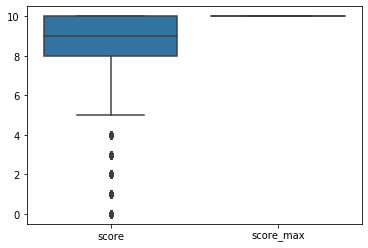

In [24]:
import seaborn as sns
sns.boxplot(data=rec_Data)

In [25]:
rec_Data[rec_Data['score']< 3]['score'].count()

125600

In [26]:
rec_Data.shape

(1327321, 11)

### This code using mean and std is taking too long to remove outliers
####  calculate summary statistics
data_mean, data_std = np.mean(rec_Data), np.std(rec_Data)
####  identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off



####  identify outliers
outliers = [x for x in rec_Data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
#### remove outliers
outliers_removed = [x for x in rec_Data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

from scipy import stats
z_scores = stats.zscore(rec_Data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = rec_Data[filtered_entries]

new_df.shape

### Score column consists some outliers
Tried to remove outliers using quantile method, but if we take 24 percentile and 75 percentile and compute IQR, it removes 200126 records from the dataset.
If we take 25 and 75 percentile, it removes more records and we do not get 1 million records for processing. So 24 and 75 percentile is considered.

In [27]:
Q1=rec_Data['score'].quantile(0.24)
Q3=rec_Data['score'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)


8.0
10.0
2.0


In [28]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

5.0 13.0


In [29]:
rec_Data[rec_Data['score']<=Lower_Whisker].shape

(200126, 11)

In [30]:
data_new1 = rec_Data[rec_Data['score']<=Lower_Whisker]
data_new1.shape

(200126, 11)

In [31]:
rec_Data_new = rec_Data[rec_Data['score']> Lower_Whisker]

In [32]:
rec_Data.shape

(1327321, 11)

In [33]:
#Keep only 1000000 data samples. Use random state=612
rec_Data = rec_Data.sample(n=1000000,random_state=612)

In [34]:
rec_Data.shape

(1000000, 11)

### Dataset after applying Task 1 step1 to step 7 

In [35]:
rec_Data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
99002,/cellphones/sony-xperia-z1-compact-d5503/,3/27/2014,en,us,Amazon,amazon.com,10.0,10.0,I'd only owned Samsung before. But Sony is rea...,Barry T.,Sony Xperia Z1 Compact D5503 Android Smartphon...
236502,/cellphones/doro-liberto-820/,12/6/2014,en,gb,Amazon,amazon.co.uk,10.0,10.0,My savvy grandson bought this for me as a suit...,Robert Harris,Doro Liberto 820 SIM-Free Smartphone - Black/S...
99154,/cellphones/samsung-galaxy-ace-s5830/,12/10/2013,fr,fr,Ciao,ciao.fr,4.0,10.0,"Je rejoins l'avis prÃ©cÃ©dent! Au dÃ©part, je ...",llunell,Samsung Galaxy Ace S5830i
147653,/cellphones/htc-desire-10-lifestyle/,11/23/2016,en,in,Amazon,amazon.in,10.0,10.0,very good product from HTC,Amazon Customer,"HTC Desire 10 Lifestyle (Polar White, 32 GB) -..."
143947,/cellphones/samsung-galaxy-a5-2016/,7/22/2016,ru,ru,Yandex,market.yandex.ru,10.0,10.0,Ñ Ð¾ÑÐ¾ÑÐ¸Ð¹ ÑÐµÐ»ÐµÑÐ¾Ð½. Ð·Ð¼Ð¾Ð¶Ð½Ð¾ Ð½...,lizerginiy,Samsung Galaxy A5 (2016) SM-A510F


In [36]:
rec_Data.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [37]:
rec_Data['extract']

99002     I'd only owned Samsung before. But Sony is rea...
236502    My savvy grandson bought this for me as a suit...
99154     Je rejoins l'avis prÃ©cÃ©dent! Au dÃ©part, je ...
147653                           very good product from HTC
143947    Ñ
Ð¾ÑÐ¾ÑÐ¸Ð¹ ÑÐµÐ»ÐµÑÐ¾Ð½. Ð·Ð¼Ð¾Ð¶Ð½Ð¾ Ð½...
                                ...                        
72988     Es rapido rapido rapido Mejorable la calidad d...
186598    Great feel...Ease of use...Speed...Free music(...
254554    Ho comprato HTC One nell passato e mi sono tro...
83277     top toestel werkt super goed. in het begin was...
267651    Ik ben zeer tevreden over mijn nieuwe iPhone. ...
Name: extract, Length: 1000000, dtype: object

In [38]:
#Drop irrelevant features. Keep features like Author, Product, and Score.
column_list = ['phone_url','date','lang','country','source','domain']
rec_Data.drop(column_list,axis=1,inplace=True)


In [39]:
rec_Data.reset_index(drop=False,inplace=True)

In [40]:
rec_Data.head()

,index,score,score_max,extract,author,product
0,99002,10.0,10.0,I'd only owned Samsung before. But Sony is rea...,Barry T.,Sony Xperia Z1 Compact D5503 Android Smartphon...
1,236502,10.0,10.0,My savvy grandson bought this for me as a suit...,Robert Harris,Doro Liberto 820 SIM-Free Smartphone - Black/S...
2,99154,4.0,10.0,"Je rejoins l'avis prÃ©cÃ©dent! Au dÃ©part, je ...",llunell,Samsung Galaxy Ace S5830i
3,147653,10.0,10.0,very good product from HTC,Amazon Customer,"HTC Desire 10 Lifestyle (Polar White, 32 GB) -..."
4,143947,10.0,10.0,Ñ Ð¾ÑÐ¾ÑÐ¸Ð¹ ÑÐµÐ»ÐµÑÐ¾Ð½. Ð·Ð¼Ð¾Ð¶Ð½Ð¾ Ð½...,lizerginiy,Samsung Galaxy A5 (2016) SM-A510F


In [41]:
rec_Data.drop('index',axis=1,inplace=True)

In [42]:
rec_Data.head()

,score,score_max,extract,author,product
0,10.0,10.0,I'd only owned Samsung before. But Sony is rea...,Barry T.,Sony Xperia Z1 Compact D5503 Android Smartphon...
1,10.0,10.0,My savvy grandson bought this for me as a suit...,Robert Harris,Doro Liberto 820 SIM-Free Smartphone - Black/S...
2,4.0,10.0,"Je rejoins l'avis prÃ©cÃ©dent! Au dÃ©part, je ...",llunell,Samsung Galaxy Ace S5830i
3,10.0,10.0,very good product from HTC,Amazon Customer,"HTC Desire 10 Lifestyle (Polar White, 32 GB) -..."
4,10.0,10.0,Ñ Ð¾ÑÐ¾ÑÐ¸Ð¹ ÑÐµÐ»ÐµÑÐ¾Ð½. Ð·Ð¼Ð¾Ð¶Ð½Ð¾ Ð½...,lizerginiy,Samsung Galaxy A5 (2016) SM-A510F


#### Task 2: Answer the following questions
##### 1. Identify the most rated features.
##### 2. Identify the users with most number of reviews.
##### 3. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [43]:
# to lower case
rec_Data['author'] = rec_Data['author'].map(lambda x: x.lower())

In [44]:
rec_Data['product'] = rec_Data['product'].map(lambda x: x.lower())

In [45]:
for index, row in rec_Data.iterrows():
    row['author'] = [x.lower().replace(' ','') for x in row['author']]
    row['product'] = ''.join(row['product']).lower()

In [46]:
rec_Data['product']

0         sony xperia z1 compact d5503 android smartphon...
1         doro liberto 820 sim-free smartphone - black/s...
2                                 samsung galaxy ace s5830i
3         htc desire 10 lifestyle (polar white, 32 gb) -...
4                         samsung galaxy a5 (2016) sm-a510f
                                ...                        
999995    lg google nexus 5 - smartphone libre android (...
999996                     google pixel xl, phone by google
999997    htc one mini smartphone (10,9 cm (4,3 pollici)...
999998                     samsung galaxy s6 edge 32gb gold
999999                            apple iphone 6 16gb black
Name: product, Length: 1000000, dtype: object

#### Top 10 products with maximam reviews

In [47]:
rec_Data.groupby('product')['score'].count().sort_values(ascending=False).head(5)

product
lenovo vibe k4 note (white,16gb)     3929
lenovo vibe k4 note (black, 16gb)    3238
oneplus 3 (graphite, 64 gb)          3142
oneplus 3 (soft gold, 64 gb)         2643
samsung galaxy express i8730         2028
Name: score, dtype: int64

In [48]:
rec_Data.groupby('product')['score'].mean().sort_values(ascending=False).head(5)

product
ùø§ùø§ùù p9 ø¨ùùø³ - 64 ø¬ùø¬ø§ø¨ø§ùøªø ùùø± ø¬ù ø§ù øªù ø§ùø ùø§ù ùø§ùø ø°ùø¨ù    10.0
google huawei nexus 6p                                                                                    10.0
samsung galaxy s7 pink gold                                                                               10.0
samsung galaxy s7 g930f 32gb single sim unlocked phone - retail packaging - gold                          10.0
samsung galaxy s7 g930f 32gb mobiltelefon                                                                 10.0
Name: score, dtype: float64

In [49]:
new_Data = pd.DataFrame(rec_Data.groupby('product')['score'].mean())
new_Data['product'] = rec_Data.groupby('product')['product']
new_Data['rating_count'] = rec_Data.groupby('product')['score'].count()
new_Data['cum_rating'] = rec_Data.groupby('product')['score'].sum()/rec_Data.shape[0]
new_Data.columns

Index(['score', 'product', 'rating_count', 'cum_rating'], dtype='object')

In [50]:
new_Data.sort_values(by=['cum_rating','score'],ascending=False).head(5)

,score,product,rating_count,cum_rating
product,,,,
"lenovo vibe k4 note (white,16gb)",7.222194,"(lenovo vibe k4 note (white,16gb), [lenovo vib...",3929,0.028376
"oneplus 3 (graphite, 64 gb)",8.707193,"(oneplus 3 (graphite, 64 gb), [oneplus 3 (grap...",3142,0.027358
"lenovo vibe k4 note (black, 16gb)",7.205683,"(lenovo vibe k4 note (black, 16gb), [lenovo vi...",3238,0.023332
"oneplus 3 (soft gold, 64 gb)",8.501703,"(oneplus 3 (soft gold, 64 gb), [oneplus 3 (sof...",2643,0.022470
samsung galaxy express i8730,8.988166,"(samsung galaxy express i8730, [samsung galaxy...",2028,0.018228


#### 2. Top 10 users with maximam ratings

In [ ]:
rec_Data.groupby('author')['score'].count().sort_values(ascending=False).head(10)

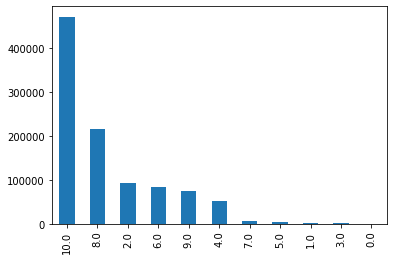

In [52]:
rec_Data.score.value_counts().plot(kind='bar')
plt.show()

#### Identify the most rated features.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# initialize vectorizer
#vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.002) #min_df - rare words , max_df - most used words
#ngram_range = (1,2) - if used more than 1(value), lot of features or noise

In [55]:
vect.fit(rec_Data['product'])
product_matrix = vect.transform(rec_Data['product'])

In [56]:
product_matrix.shape

(1000000, 935)

In [ ]:
# Find vocabulary
features = vect.get_feature_names()
#features

In [58]:
len(features)

935

In [59]:
# confirm count of features in the corpus
word_count = [rec_Data["product"].str.contains("\\b"+x+"\\b", case=False).sum() for x in features]
word_count

In [60]:
feature_list=[]
count_list=[]
for x,y in zip(features,word_count):
    print (x,y,"\n")
    feature_list.append(x)
    count_list.append(y)
    

### Top 10 features

In [61]:
data = {'feature':feature_list,'counts':count_list}
feature_Data=pd.DataFrame(data)
feature_Data.sort_values(by='counts',ascending=False).head(10)

#### 3. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [62]:
#selected_Data = rec_Data[rec_Data.groupby('product')['score'].count()>50]
selected_Data = rec_Data.groupby('product').filter(lambda g:g.score.count()>50)

In [63]:
selected_Data.shape

(570039, 5)

In [64]:
selected_Data = selected_Data.groupby('author').filter(lambda g:g.score.count()>50)

In [65]:
selected_Data.head()

,score,score_max,extract,author,product
3,10.0,10.0,very good product from HTC,amazon customer,"htc desire 10 lifestyle (polar white, 32 gb) -..."
33,10.0,10.0,"Bonjour, La coque est parfaitement adaptÃ©e au...",client d'amazon,"aicek coque samsung galaxy a3 2016, aicek etui..."
44,8.0,10.0,Only heating issue other wise good product bes...,amazon customer,"motorola moto g5 (3 gb, lunar grey)"
51,4.0,10.0,Good budget smartphone but battery backup is poor,amazon customer,yu yunique yu4711 smartphone (black)
70,10.0,10.0,"Ottimo prodotto, pienamente conforme alla desc...",massimiliano,"samsung c3520, telefono cellulare, argento [ge..."


In [66]:
selected_Data.shape

(107734, 5)

### 3. Build a popularity based model and recommend top 5 mobile phones.

In [67]:
ratings_mean_count = pd.DataFrame(selected_Data.groupby('product')['score'].mean()) 

In [68]:
ratings_mean_count['rating_counts'] = pd.DataFrame(selected_Data.groupby('product')\
                                                   ['score'].count()) 

### Top 5 products based on highest ratings 

In [69]:
ratings_mean_count.sort_values(by='score',ascending=False).head()  

,score,rating_counts
product,,
samsung galaxy s plus gt-i9001,10.0,1
samsung i9000 galaxy s,10.0,2
samsung i9100 galaxy s ii,10.0,3
samsung galaxy s5 - blanc - smartphone,10.0,2
htc rhyme,10.0,2


### Top 5 products based on number of ratings

In [70]:
ratings_mean_count.sort_values(by='rating_counts',ascending=False).head()  

,score,rating_counts
product,,
"lenovo vibe k4 note (white,16gb)",7.078290,2363
"lenovo vibe k4 note (black, 16gb)",7.081527,1938
"oneplus 3 (graphite, 64 gb)",8.488326,1499
"oneplus 3 (soft gold, 64 gb)",8.242921,1342
"lenovo vibe k5 (gold, volte update)",6.656887,1227


In [71]:
ratings_pivot = pd.pivot_table(data=ratings_mean_count, values=['rating_counts','score'], columns='product')    
        
ratings_pivot.transpose().head()  

,rating_counts,score
product,,
5.5-inch unlocked lenovo a850 3g smartphone-(960x540) quad core 4gb mt6582m 1331mhz android 4.2 dual camera +dual sim -black (rooted + google play),4.0,4.500000
access-discount samsung galaxy j3 2016 coque silicone gel tpu + film protection ecran en verre trempã© galaxy j3 (2016) j320f j3-6,58.0,6.551724
acer liquid,1.0,9.000000
acer liquid e,4.0,7.250000
"acer liquid e2 duo 11,4 cm (4,5 zoll) smartphone (touchscreen, dual-sim, 1,2ghz quadcore prozessor, 1gb ram, 8 megapixel kamera, android 4.2) weiã",16.0,7.000000


In [72]:
ratings_pivot.transpose().sort_values(by='rating_counts',ascending=False).head()

,rating_counts,score
product,,
"lenovo vibe k4 note (white,16gb)",2363.0,7.078290
"lenovo vibe k4 note (black, 16gb)",1938.0,7.081527
"oneplus 3 (graphite, 64 gb)",1499.0,8.488326
"oneplus 3 (soft gold, 64 gb)",1342.0,8.242921
"lenovo vibe k5 (gold, volte update)",1227.0,6.656887


### 4. Build a collaborative filtering model using SVD. 
##### 1. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). 
#### 2. Build a collaborative iltering model using kNNWithMeans from surprise. 
#### 3. You can try both user-based and item-based model.

### 1. Collaboartive filtering model using SVD from surprise.

In [73]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, KFold
from surprise import accuracy
from surprise.model_selection import train_test_split

In [74]:
selected_Data['raw_ratings'] = selected_Data['score']
selected_Data.head()

,score,score_max,extract,author,product,raw_ratings
3,10.0,10.0,very good product from HTC,amazon customer,"htc desire 10 lifestyle (polar white, 32 gb) -...",10.0
33,10.0,10.0,"Bonjour, La coque est parfaitement adaptÃ©e au...",client d'amazon,"aicek coque samsung galaxy a3 2016, aicek etui...",10.0
44,8.0,10.0,Only heating issue other wise good product bes...,amazon customer,"motorola moto g5 (3 gb, lunar grey)",8.0
51,4.0,10.0,Good budget smartphone but battery backup is poor,amazon customer,yu yunique yu4711 smartphone (black),4.0
70,10.0,10.0,"Ottimo prodotto, pienamente conforme alla desc...",massimiliano,"samsung c3520, telefono cellulare, argento [ge...",10.0


In [75]:
drop_list = ['score','score_max','extract']
selected_Data.drop(drop_list,axis=1,inplace=True)

In [76]:
selected_Data.head()

,author,product,raw_ratings
3,amazon customer,"htc desire 10 lifestyle (polar white, 32 gb) -...",10.0
33,client d'amazon,"aicek coque samsung galaxy a3 2016, aicek etui...",10.0
44,amazon customer,"motorola moto g5 (3 gb, lunar grey)",8.0
51,amazon customer,yu yunique yu4711 smartphone (black),4.0
70,massimiliano,"samsung c3520, telefono cellulare, argento [ge...",10.0


In [77]:
df = pd.DataFrame(selected_Data)
reader = Reader(rating_scale=(1, 10))
# Loads Pandas dataframe
data = Dataset.load_from_df(df[["author", "product", "raw_ratings"]], reader)

In [78]:
algo_svd = SVD()
# Run 5-fold cross-validation and then print results
cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6979  2.7203  2.6939  2.6796  2.7056  2.6995  0.0134  
MAE (testset)     2.1059  2.1187  2.1021  2.0875  2.0977  2.1024  0.0102  
Fit time          7.32    7.33    7.39    7.35    7.34    7.35    0.02    
Test time         0.25    0.25    0.25    0.25    0.25    0.25    0.00    


{'test_rmse': array([2.69794333, 2.72032349, 2.69393717, 2.67958722, 2.70560946]),
 'test_mae': array([2.10590689, 2.11868655, 2.10207622, 2.08751852, 2.09769041]),
 'fit_time': (7.31737494468689,
  7.328676223754883,
  7.388018846511841,
  7.349374294281006,
  7.342046022415161),
 'test_time': (0.25267601013183594,
  0.2456958293914795,
  0.24655580520629883,
  0.24660682678222656,
  0.24523091316223145)}

### SVD with train, test split

In [79]:
trainset, testset = train_test_split(data, test_size=.20)

In [80]:
algo_svd = SVD()
# Run 5-fold cross-validation and then print results
algo_svd.fit(trainset)


In [82]:
predictions = algo_svd.test(testset)
#predictions
print("First 5 output")
for k,item in zip( range(1,6),predictions):
     print(item)

First 5 output
user: einer kundin item: samsung galaxy s7 edge smartphone, 13,9 cm (5,5 zoll) display, lte (4g) r_ui = 8.00   est = 9.63   {'was_impossible': False}
user: amazon customer item: oneplus 3 (graphite, 64 gb) r_ui = 8.00   est = 9.23   {'was_impossible': False}
user: paul       item: motorola moto z play with style mod (black, 32gb) r_ui = 8.00   est = 7.84   {'was_impossible': False}
user: alessandro item: lenovo motorola moto g 4g 3 generazione smartphone, display 5", fotocamera 13 mp, memoria 16 gb, android 6 lollipop, nero [italia] r_ui = 10.00   est = 9.30   {'was_impossible': False}
user: amazon customer item: blu vivo xl smartphone - 5.5" 4g lte - gsm unlocked - solid gold r_ui = 8.00   est = 7.55   {'was_impossible': False}


In [83]:
accuracy.rmse(predictions)

RMSE: 2.6938


2.693793808076988

In [98]:
from collections import defaultdict 
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for author, product, true_r, est, _ in predictions:
        top_n[author].append((product, est))

    # Then sort the predictions for each author and retrieve the k highest ones.
    for author, est in top_n.items():
        est.sort(key=lambda x: x[1], reverse=True)
        top_n[author] = est[:n]

    return top_n

In [102]:
top_n = get_top_n(predictions, n=10)
top_n
print("First 10 output")
for k,item in zip(range(1,10),top_n):
    print(item)

First 10 output
einer kundin
amazon customer
paul
alessandro
amazon kunde
sandra
client d'amazon
cliente amazon
melissa


In [111]:
# Print the recommended items for each user
count = 0
for author,est in top_n.items():
    print("\n",author, [product for (product, _) in est])
    count=count + 1
    if(count==5):
        break
    


 einer kundin ['apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb', 'apple iphone 7 4,7" 32 gb']

 amazon customer ['lg electronics nexus 5 uk smartphone - black (16gb)', 'doro phoneeasy 612 gsm sim free mobile phone - black', 'lg electronics nexus 5x 5.2-inch 16 gb sim-free smartphone - black', 'lg electronics nexus 5 uk smartphone - black (16gb)', 'lg electronics nexus 5 uk smartphone - black (16gb)', 'lg electronics nexus 5 uk smartphone - black (16gb)', 'lg electronics nexus 5x 5.2-inch 16 gb sim-free smartphone - black', 'spigen neo hybrid galaxy s6 edge case with flexible inner tpu and reinforced hard bumper frame for samsung galaxy s6 edge 2015 - gunmetal', 'doro phoneeasy 612 gsm sim free mobile phone - black', 'vodafone smart ultra 6 pay as you go android smartphone - bla

### 2. Build a collaborative iltering model using kNNWithMeans from surprise.
#### 1. User-user based model

#### Collaborative filtering with kNNWithMeans from surprise.

In [112]:
from surprise import KNNWithMeans

In [113]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [118]:
# run the trained model against the testset
test_pred_user = algo_user.test(testset)

In [124]:
test_pred_user
print("First 5 output")
for k,item in zip(range(1,6),test_pred_user):
    print("\n",item)

First 5 output

 user: einer kundin item: samsung galaxy s7 edge smartphone, 13,9 cm (5,5 zoll) display, lte (4g) r_ui = 8.00   est = 9.56   {'actual_k': 50, 'was_impossible': False}

 user: amazon customer item: oneplus 3 (graphite, 64 gb) r_ui = 8.00   est = 8.36   {'actual_k': 50, 'was_impossible': False}

 user: paul       item: motorola moto z play with style mod (black, 32gb) r_ui = 8.00   est = 7.93   {'actual_k': 2, 'was_impossible': False}

 user: alessandro item: lenovo motorola moto g 4g 3 generazione smartphone, display 5", fotocamera 13 mp, memoria 16 gb, android 6 lollipop, nero [italia] r_ui = 10.00   est = 9.31   {'actual_k': 31, 'was_impossible': False}

 user: amazon customer item: blu vivo xl smartphone - 5.5" 4g lte - gsm unlocked - solid gold r_ui = 8.00   est = 7.44   {'actual_k': 50, 'was_impossible': False}


5. Evaluate the collaborative model. Print RMSE value.

In [125]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)

User-based Model : Test Set
RMSE: 2.7696


2.769587412344846

### 6. Predict score (average rating) for test users.

In [126]:
# Query for specific predicions
uid = str("uk guest")  # raw user id
iid = str("siemens mc60")  # raw item id


In [127]:
# get a prediction for specific users and items.
pred = algo_user.predict(uid, iid, verbose=True)
print(pred)

user: uk guest   item: siemens mc60 r_ui = None   est = 9.00   {'actual_k': 2, 'was_impossible': False}
user: uk guest   item: siemens mc60 r_ui = None   est = 9.00   {'actual_k': 2, 'was_impossible': False}


### Predictions on test data, best predictions, average ratings

In [128]:
def get_Iu(uid):
 # no of items rated by given user        
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
   # no of users rated the given item       
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0
    
df_pred = pd.DataFrame(test_pred_user, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred['n_Itemsu'] = df_pred.uid.apply(get_Iu)
df_pred['n_Usersi'] = df_pred.iid.apply(get_Ui)
df_pred['err'] = abs(df_pred.est - df_pred.rui)
best_predictions = df_pred.sort_values(by='err')[:10]
worst_predictions = df_pred.sort_values(by='err')[-10:]

In [129]:
best_predictions

,uid,iid,rui,est,details,n_Itemsu,n_Usersi,err
1082,client d'amazon,honor 6 smartphone dã©bloquã© 4g cat 6 (ecran ...,10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",2288,1,0.0
16186,zehrabalta,samsung omnia (i900) cep telefonu,9.0,9.0,"{'actual_k': 44, 'was_impossible': False}",121,44,0.0
16158,miatamania,nokia n93 cep telefonu,9.0,9.0,"{'actual_k': 25, 'was_impossible': False}",107,25,0.0
16142,amazon customer,apple iphone 4s 32gb black - unlocked,8.0,8.0,"{'actual_k': 7, 'was_impossible': False}",35135,7,0.0
1142,riccardo,apple iphone 6s 64gb 4g oro,10.0,10.0,"{'actual_k': 22, 'was_impossible': False}",94,32,0.0
8943,miatamania,samsung u800 cep telefonu,9.0,9.0,"{'actual_k': 23, 'was_impossible': False}",107,23,0.0
20248,miatamania,nokia n82 cep telefonu,9.0,9.0,"{'actual_k': 35, 'was_impossible': False}",107,35,0.0
20228,amazon customer,"samsung t699 ""galaxy s relay 4g"" t-mobile andr...",10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",35135,5,0.0
16096,misafir,lg (514) optimus one p503,9.0,9.0,"{'actual_k': 1, 'was_impossible': False}",70,1,0.0
16085,alberto,sony xperia z2 - smartphone libre android (pan...,10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",171,4,0.0


### Average rating for top 10 users.

In [130]:
df_pred[['uid','iid','est']].sort_values(by='est',ascending=False).head(10)

,uid,iid,est
19601,alex,samsung ativ s (i8750) - smartphone libre wind...,10.0
6934,lahr2006,samsung galaxy alpha,10.0
14679,jonathan,honor 6 smartphone dã©bloquã© 4g cat 6 (ecran ...,10.0
18970,amazon customer,samsung galaxy s4 i545 16gb verizon wireless c...,10.0
18972,adam,"samsung galaxy s3, black 16gb (verizon wireless)",10.0
18977,alex,"lg electronics g flex 2 smartphone (13,97 cm (...",10.0
18981,abhishek,"oneplus 3 (soft gold, 64 gb)",10.0
4483,diego,"blackberry z30 unlocked cellphone, 16gb, black",10.0
14578,james,samsung galaxy note 3 n900a unlocked cellphone...,10.0
14510,dan,lg 440g prepaid phone with double minutes (tra...,10.0


### Predict score (average rating) for test users.

In [131]:
test_users_list = ['amazon customer','max','cliente amazon','angel','mauro']
for user in test_users_list:
    est_rating = df_pred[df_pred['uid']==user].est.mean()
    print("User: ",user,"average rating: ",est_rating)
    

User:  amazon customer average rating:  7.025846832805935
User:  max average rating:  8.499620107489747
User:  cliente amazon average rating:  8.168781345065538
User:  angel average rating:  8.327512832242597
User:  mauro average rating:  8.667353633131192


### Top 10 predictions for each user
Considered output from user-user based collaborative filtering.

In [132]:
from collections import defaultdict 
def get_top_n(test_pred_user, n=10):
    # First map the predictions to each user.
    top_n_user = defaultdict(list)
    for author, product, true_r, est, _ in test_pred_user:
        top_n_user[author].append((product, est))

    # Then sort the predictions for each author and retrieve the k highest ones.
    for author, est in top_n_user.items():
        est.sort(key=lambda x: x[1], reverse=True)
        top_n_user[author] = est[:n]

    return top_n_user

In [138]:
top_n_user = get_top_n(test_pred_user, n=10)
print("First 10 output")
for k,user,item in zip(range(1,11),top_n_user,top_n_user.values()):
        print("\n","User: ",user,item)

First 10 output

 User:  einer kundin [('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88)]

 User:  amazon customer [('lg google nexus 5 d820 32gb unlocked gsm 4g lte android phone - red', 10), ('samsung galaxy a5 - smartphone libre android (pantalla 5", cã¡mara 13 mp, 16 gb, quad-core 1.2 ghz, 2 gb ram), plateado (importado de italia)', 10), ('lg electronics g3 uk sim-free smartphone - gold (android, 5.5-inch, 16gb)', 10), ('samsung galaxy s iii, purple 16gb (sprint)', 10), ('samsung galaxy s5 sim-free smartphone, sm-g900f - black', 10), ('htc one max 16gb lte 4g unlocked gsm android phone (silver)', 10), ('samsung s5230 tocco lite sim free mobile phone - black', 10), ('sa

In [ ]:
test_users_list = ['amazon customer','max','cliente amazon','angel','mauro']
for item in test_users_list:
    if item in top_n_user:
        value = top_n_user.get(item)
        print("Top 10 Recommendations for Author:",item,"\n")
        count = 1
        for values in value:
            print("Recommended Product ",count,": ", values[0]," \n Rating : ",values[1],"\n")
            count= count+1

### Top 10 predictions for each user
Considered output from the SVD predictions.

In [139]:
from collections import defaultdict 
def get_top_n(test_pred, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for author, product, true_r, est, _ in test_pred:
        top_n[author].append((product, est))

    # Then sort the predictions for each author and retrieve the k highest ones.
    for author, est in top_n.items():
        est.sort(key=lambda x: x[1], reverse=True)
        top_n[author] = est[:n]

    return top_n

In [143]:
top_n = get_top_n(predictions, n=10)
top_n
print("First 10 output")
for k,user,item in zip(range(1,11),top_n_user,top_n_user.values()):
     print("\n","User: ",user,item)

First 10 output

 User:  einer kundin [('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88), ('apple iphone 7 4,7" 32 gb', 9.88)]

 User:  amazon customer [('lg google nexus 5 d820 32gb unlocked gsm 4g lte android phone - red', 10), ('samsung galaxy a5 - smartphone libre android (pantalla 5", cã¡mara 13 mp, 16 gb, quad-core 1.2 ghz, 2 gb ram), plateado (importado de italia)', 10), ('lg electronics g3 uk sim-free smartphone - gold (android, 5.5-inch, 16gb)', 10), ('samsung galaxy s iii, purple 16gb (sprint)', 10), ('samsung galaxy s5 sim-free smartphone, sm-g900f - black', 10), ('htc one max 16gb lte 4g unlocked gsm android phone (silver)', 10), ('samsung s5230 tocco lite sim free mobile phone - black', 10), ('sa

### Item-item collaboarative filtering based recommendation system.

In [144]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [145]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)

In [146]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 2.6993


2.699290869013886

In [147]:
print("SVD based Model : Test Set")
accuracy.rmse(predictions,verbose=True)
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

SVD based Model : Test Set
RMSE: 2.6938
User-based Model : Test Set
RMSE: 2.7696
Item-based Model : Test Set
RMSE: 2.6993


2.699290869013886

#### GridSearchCV is applied with similarity measures 'msd' and 'cosine' on use based and item based collaborative fltering.
Cross validation with k = 3 is used.
Best rmse score and best parameters are shown.
Its taking long time to execute so skipped it.

In [148]:
#from surprise.model_selection import GridSearchCV
#sim_options = {
#    "name": ["msd", "cosine"],
#    "min_support": [3, 4, 5],
#    "user_based": [False, True],
#}

#param_grid = {"sim_options": sim_options}

#gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
#gs.fit(data)

#print(gs.best_score["rmse"])
#print(gs.best_params["rmse"])

### 7. Report your findings and inferences.

#### Used SVD, user-user based and item-item based collaborative filtering.
All the methods gives the rmse is around 2.7 for all methods used.


### 8. Try and recommend top 5 products for test users.

In [149]:
# based on svd predictions
test_users_list = ['amazon customer','max','cliente amazon','angel','mauro']
for item in test_users_list:
    if item in top_n:
        value = top_n.get(item)
        print("Top 5 Recommendations for Author:",item,"\n")
        count = 1
        for values in value:
            print("Recommended Product ",count,": ", values[0]," \n Rating : ",values[1],"\n")
            count= count+1
            

Top 5 Recommendations for Author: amazon customer 

Recommended Product  1 :  lg electronics nexus 5 uk smartphone - black (16gb)  
 Rating :  10 

Recommended Product  2 :  doro phoneeasy 612 gsm sim free mobile phone - black  
 Rating :  10 

Recommended Product  3 :  lg electronics nexus 5x 5.2-inch 16 gb sim-free smartphone - black  
 Rating :  10 

Recommended Product  4 :  lg electronics nexus 5 uk smartphone - black (16gb)  
 Rating :  10 

Recommended Product  5 :  lg electronics nexus 5 uk smartphone - black (16gb)  
 Rating :  10 

Recommended Product  6 :  lg electronics nexus 5 uk smartphone - black (16gb)  
 Rating :  10 

Recommended Product  7 :  lg electronics nexus 5x 5.2-inch 16 gb sim-free smartphone - black  
 Rating :  10 

Recommended Product  8 :  spigen neo hybrid galaxy s6 edge case with flexible inner tpu and reinforced hard bumper frame for samsung galaxy s6 edge 2015 - gunmetal  
 Rating :  10 

Recommended Product  9 :  doro phoneeasy 612 gsm sim free mobil

### 9. Check for outliers and impute them as required.

### Implemented above at the start

### 10. Try cross validation techniques to get better results.

In [150]:
cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6874  2.6969  2.6929  2.7159  2.7262  2.7039  0.0147  
MAE (testset)     2.0728  2.0866  2.0829  2.0915  2.1434  2.0954  0.0248  
Fit time          7.47    7.31    7.35    7.30    7.34    7.35    0.06    
Test time         0.26    0.25    0.25    0.25    0.25    0.25    0.00    


{'test_rmse': array([2.68740228, 2.69685248, 2.69293665, 2.71592705, 2.72624868]),
 'test_mae': array([2.07283035, 2.08660205, 2.08286396, 2.09147675, 2.14340132]),
 'fit_time': (7.471107482910156,
  7.311555624008179,
  7.3535315990448,
  7.298506021499634,
  7.338504791259766),
 'test_time': (0.25785303115844727,
  0.2529788017272949,
  0.25298547744750977,
  0.2486400604248047,
  0.251253604888916)}

In [151]:
cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7551  2.8070  2.7719  2.7876  2.7688  2.7781  0.0178  
MAE (testset)     2.1021  2.1420  2.1101  2.1183  2.1017  2.1148  0.0149  
Fit time          1.44    1.42    1.42    1.42    0.85    1.31    0.23    
Test time         6.76    6.01    5.98    3.25    6.

{'test_rmse': array([2.75514761, 2.8070278 , 2.77190936, 2.78764452, 2.76876884]),
 'test_mae': array([2.10213144, 2.1419746 , 2.11013977, 2.11826251, 2.10169756]),
 'fit_time': (1.43696928024292,
  1.420933723449707,
  1.4204246997833252,
  1.4227728843688965,
  0.8518192768096924),
 'test_time': (6.755309581756592,
  6.008702516555786,
  5.982185125350952,
  3.2504730224609375,
  6.0859551429748535)}

In [152]:
cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7043  2.7326  2.7316  2.7258  2.6772  2.7143  0.0212  
MAE (testset)     2.0821  2.1161  2.1163  2.1010  2.0685  2.0968  0.0189  
Fit time          133.72  127.86  104.00  137.23  124.39  125.44  11.61   
Test time         264.08  349.84  284.04  318.71  27

{'test_rmse': array([2.70429889, 2.73260061, 2.73160222, 2.72579164, 2.67716275]),
 'test_mae': array([2.08214935, 2.11608589, 2.11628575, 2.10098332, 2.06854116]),
 'fit_time': (133.71769905090332,
  127.86177921295166,
  103.99961042404175,
  137.22911190986633,
  124.39160132408142),
 'test_time': (264.07502794265747,
  349.84211254119873,
  284.0393388271332,
  318.71424746513367,
  275.3188147544861)}

### 11. In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation system provides general recommendations to its users based on the current trend or product popularity or the products purchased by most of the people and rated as high.
It takes the average ratings of each product and recommends the topmost products to its users.
It does not provide with personal recommendations based on users ineterests or attributes.

Popularity based Recommendation system is used in the following business scenarios:
1. When users disable their tracking information its difficult to get the interests, instead of having zero recommendations, popular products can be recommended.
2. When business is started, and there are no any ratings available. Then popularity of products can be considered.
e.g. Popular books, movies etc.
3. When sufficient ratings data is not available for individual users interests. So to start with we can build popularity based recommendation system. When sufficient rating data is collected over time then can shift to personalization based on collaborative filtering methods.


### 12. In what business scenario you should use CF based Recommendation Systems ?

Collaboartive filtering based recommendation system provides personalized recommendations to its users based on users interests or attributes. It can be based on user similarity, in which case recommendations are provided based on users who have purchased the same product. It finds neighbours based on common ratings provided by users.
It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.
In item-item based recommendation system provides recommendations based on item similarity. Items which has similar ratings can be considered as similar items.

#### Collaborative Filtering based recommendation systems are user in the following business scenarios:
In case sufficient user and rating data is available, can use collaborative filtering recommendation system.
It provides personalized ratings useful for better sell of the products and frequent visits by the users/customers.
Collaborative filtering doesn’t require features about the items or users to be known. It is suited for a set of different types of items, for example, a supermarket’s inventory where items of various categories can be added. 

Although collaborative Filtering is very commonly used in recommenders, some of the challenges that are faced while using it are the following:

Problems with Collaborative filtering:
1. Cold start for new items that are added to the list. Until someone rates them, they don’t get recommended.

2. Data sparsity can affect the quality of user-based recommenders and also add to the cold start problem mentioned above.

3. Scaling can be a challenge for growing datasets as the complexity can become too large. Item-based recommenders are faster than user-based when the dataset is large.




### 13. What other possible methods can you think of which can further improve the recommendation for different users ?

To improve recommendation systems we can use following methods:
#### Hybrid filtering techniques.

#### Hybrid filtering techniques:
Hybrid filtering technique combines different recommendation techniques in order to gain better system optimization to avoid some limitations and problems of pure recommendation systems.
In hybrid techniques,a combination of algorithms is used.
It will provide more accurate and effective recommendations than a single algorithm as the disadvantages of one algorithm can be overcome by another algorithm.
The combination of approaches can be done in any of the following ways: 
1. Separate implementation of algorithms and combining the result
2. Utilizing some content-based filtering in collaborative approach
3. Utilizing some collaborative filtering in content-based approach
4. Creating a unified recommendation system that brings together both approaches.

##### Weighted hybridization combines the results of different recommenders to generate a recommendation list or prediction by integrating the scores from each of the techniques in use by a linear formula.
##### Switching hybridization
The system swaps to one of the recommendation techniques according to a heuristic reflecting the recommender ability to produce a good rating. 
The switching hybrid has the ability to avoid problems specific to one method e.g. the new user problem of content-based recommender, by switching to a collaborative recommendation system. The benefit of this strategy is that the system is sensitive to the strengths and weaknesses of its constituent recommenders. 
##### Cascade hybridization
The cascade hybridization technique applies an iterative refinement process in constructing an order of preference among different items. The recommendations of one technique are refined by another recommendation technique. The first recommendation technique outputs a coarse list of recommendations which is in turn refined by the next recommendation technique. 

##### Mixed hybridization
Mixed hybrids combine recommendation results of different recommendation techniques at the same time instead of having just one recommendation per item. Each item has multiple recommendations associated with it from different recommendation techniques.

##### Feature-combination
The features produced by a specific recommendation technique are fed into another recommendation technique. 

##### Feature-augmentation
Uses ratings and other information from previous recommender.
It also requires additional functionality from the recommender systems.




#### Some additional algorithms are applied on the dataset with cross validation with k = 3
#### Algorithms NMF, SlopeOne, NormalPredictor, KNNBaseline,KNNBasic,  KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering are used and rmse is computed for each algorithm.

In [154]:
from surprise import NMF, SVDpp, SlopeOne,NormalPredictor,KNNBaseline,KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

KeyboardInterrupt: 

In [ ]:
benchmark